# Summarization

In [2]:
!pip install -q contractions rouge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.9 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # one time execution
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re


import contractions
import gensim
import rouge
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
DOCUMENT = """
Italy, officially the Italian Republic (Italian: Repubblica Italiana [reˈpubblika itaˈljaːna]),[13][14] is a country consisting of a peninsula delimited by the Alps and several islands surrounding it,[15] whose territory largely coincides with the homonymous geographical region.[16] Italy is located in the centre of the Mediterranean Sea, in Southern Europe,[17][18][19] and is also considered part of Western Europe.[20][21] A unitary parliamentary republic with Rome as its capital and largest city, the country covers a total area of 301,340 km2 (116,350 sq mi) and shares land borders with France, Switzerland, Austria, Slovenia, and the enclaved microstates of Vatican City and San Marino. Italy has a territorial exclave in Switzerland (Campione) and a maritime exclave in Tunisian waters (Lampedusa). With around 60 million inhabitants, Italy is the third-most populous member state of the European Union. Due to its central geographic location in Southern Europe and the Mediterranean, Italy has historically been home to myriad peoples and cultures. In addition to the various ancient peoples dispersed throughout what is now modern-day Italy, the most predominant being the Indo-European Italic peoples who gave the peninsula its name, beginning from the classical era, Phoenicians and Carthaginians founded colonies mostly in insular Italy,[22] Greeks established settlements in the so-called Magna Graecia of Southern Italy, while Etruscans and Celts inhabited central and northern Italy respectively. An Italic tribe known as the Latins formed the Roman Kingdom in the 8th century BC, which eventually became a republic with a government of the Senate and the People. The Roman Republic initially conquered and assimilated its neighbours on the Italian peninsula, eventually expanding and conquering parts of Europe, North Africa and Asia. By the first century BC, the Roman Empire emerged as the dominant power in the Mediterranean Basin and became a leading cultural, political and religious centre, inaugurating the Pax Romana, a period of more than 200 years during which Italy's law, technology, economy, art, and literature developed.[23][24] During the Early Middle Ages, Italy endured the fall of the Western Roman Empire and barbarian invasions, but by the 11th century numerous rival city-states and maritime republics, mainly in the northern and central regions of Italy, became prosperous through trade, commerce, and banking, laying the groundwork for modern capitalism.[25] These mostly independent statelets served as Europe's main trading hubs with Asia and the Near East, often enjoying a greater degree of democracy than the larger feudal monarchies that were consolidating throughout Europe; however, part of central Italy was under the control of the theocratic Papal States, while Southern Italy remained largely feudal until the 19th century, partially as a result of a succession of Byzantine, Arab, Norman, Angevin, Aragonese, and other foreign conquests of the region.[26] The Renaissance began in Italy and spread to the rest of Europe, bringing a renewed interest in humanism, science, exploration, and art. Italian culture flourished, producing famous scholars, artists, and polymaths. During the Middle Ages, Italian explorers discovered new routes to the Far East and the New World, helping to usher in the European Age of Discovery. Nevertheless, Italy's commercial and political power significantly waned with the opening of trade routes that bypassed the Mediterranean.[27] Centuries of foreign meddling and conquest, and the rivalry and infighting between the Italian city-states, such as the Italian Wars of the 15th and 16th centuries, left Italy politically fragmented, and it was further conquered and divided among multiple foreign European powers over the centuries. By the mid-19th century, rising Italian nationalism and calls for independence from foreign control led to a period of revolutionary political upheaval. After centuries of foreign domination and political division, Italy was almost entirely unified in 1861 following a war of independence, establishing the Kingdom of Italy.[28] From the late 19th century to the early 20th century, Italy rapidly industrialised, mainly in the north, and acquired a colonial empire,[29] while the south remained largely impoverished and excluded from industrialisation, fuelling a large and influential diaspora.[30] Despite being one of the victorious allied powers in World War I, Italy entered a period of economic crisis and social turmoil, leading to the rise of the Italian fascist dictatorship in 1922. Participation in World War II on the Axis side ended in military defeat and economic destruction during the Italian campaign. Following the rise of the Italian Resistance and the liberation of Italy, the country abolished its monarchy, established a democratic Republic, enjoyed a prolonged economic boom, and became a highly developed country.[31] Italy has an advanced economy. The country is the eighth-largest by nominal GDP (third in the European Union), the sixth-largest by national wealth and the third-largest by central bank gold reserve. It ranks highly in life expectancy, quality of life,[32] healthcare,[33] and education. The country is a great power and it has a significant role in regional[34][35] and global [36][37] economic, military, cultural, and diplomatic affairs. Italy is a founding and leading member of the European Union and a member of numerous international institutions, including the United Nations, NATO, the OECD, the Organization for Security and Co-operation in Europe, the World Trade Organization, the Group of Seven, the G20, the Union for the Mediterranean, the Latin Union, the Council of Europe, Uniting for Consensus, the Schengen Area, and many more. The source of many inventions and discoveries, the country has long been a global centre of art, music, literature, philosophy, science and technology, and fashion, and has greatly influenced and contributed to diverse fields including cinema, cuisine, sports, jurisprudence, banking, and business.[38] As a reflection of its cultural wealth, Italy has the world's largest number of World Heritage Sites (58), and is the fifth-most visited country.
"""

DOCUMENT

"\nItaly, officially the Italian Republic (Italian: Repubblica Italiana [reˈpubblika itaˈljaːna]),[13][14] is a country consisting of a peninsula delimited by the Alps and several islands surrounding it,[15] whose territory largely coincides with the homonymous geographical region.[16] Italy is located in the centre of the Mediterranean Sea, in Southern Europe,[17][18][19] and is also considered part of Western Europe.[20][21] A unitary parliamentary republic with Rome as its capital and largest city, the country covers a total area of 301,340 km2 (116,350 sq mi) and shares land borders with France, Switzerland, Austria, Slovenia, and the enclaved microstates of Vatican City and San Marino. Italy has a territorial exclave in Switzerland (Campione) and a maritime exclave in Tunisian waters (Lampedusa). With around 60 million inhabitants, Italy is the third-most populous member state of the European Union. Due to its central geographic location in Southern Europe and the Mediterranean, I

In [6]:
DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = re.sub(r'\d+', ' ', DOCUMENT)
pattern = r'\[[^\]]*\]'
DOCUMENT = re.sub(pattern, ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()
DOCUMENT

"Italy, officially the Italian Republic (Italian: Repubblica Italiana  ),   is a country consisting of a peninsula delimited by the Alps and several islands surrounding it,  whose territory largely coincides with the homonymous geographical region.  Italy is located in the centre of the Mediterranean Sea, in Southern Europe,    and is also considered part of Western Europe.   A unitary parliamentary republic with Rome as its capital and largest city, the country covers a total area of  ,  km  ( ,  sq mi) and shares land borders with France, Switzerland, Austria, Slovenia, and the enclaved microstates of Vatican City and San Marino. Italy has a territorial exclave in Switzerland (Campione) and a maritime exclave in Tunisian waters (Lampedusa). With around   million inhabitants, Italy is the third-most populous member state of the European Union. Due to its central geographic location in Southern Europe and the Mediterranean, Italy has historically been home to myriad peoples and culture

In [7]:
sentences = nltk.sent_tokenize(DOCUMENT)

In [9]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['italy officially italian republic italian repubblica italiana country consisting peninsula delimited alps several islands surrounding whose territory largely coincides homonymous geographical region',
       'italy located centre mediterranean sea southern europe also considered part western europe',
       'unitary parliamentary republic rome capital largest city country covers total area km sq mi shares land borders france switzerland austria slovenia enclaved microstates vatican city san marino'],
      dtype='<U375')

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

In [11]:
dt_matrix.shape

(30, 385)

In [12]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(30, 30)


array([[1.   , 0.013, 0.04 , 0.012, 0.014, 0.013, 0.051, 0.033, 0.118,
        0.   , 0.016, 0.063, 0.012, 0.056, 0.038, 0.   , 0.066, 0.044,
        0.023, 0.042, 0.049, 0.046, 0.124, 0.028, 0.026, 0.   , 0.029,
        0.007, 0.019, 0.041],
       [0.013, 1.   , 0.   , 0.017, 0.02 , 0.221, 0.067, 0.   , 0.082,
        0.081, 0.074, 0.129, 0.104, 0.   , 0.   , 0.052, 0.011, 0.   ,
        0.033, 0.012, 0.014, 0.   , 0.014, 0.04 , 0.   , 0.   , 0.   ,
        0.132, 0.044, 0.017],
       [0.04 , 0.   , 1.   , 0.046, 0.   , 0.   , 0.   , 0.027, 0.027,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.062, 0.   , 0.021, 0.   , 0.024,
        0.025, 0.015, 0.071],
       [0.012, 0.017, 0.046, 1.   , 0.018, 0.016, 0.034, 0.   , 0.   ,
        0.   , 0.069, 0.016, 0.016, 0.   , 0.   , 0.   , 0.01 , 0.   ,
        0.03 , 0.011, 0.013, 0.   , 0.013, 0.037, 0.   , 0.   , 0.   ,
        0.009, 0.   , 0.016],
       [0.014, 0.02 , 0.   ,

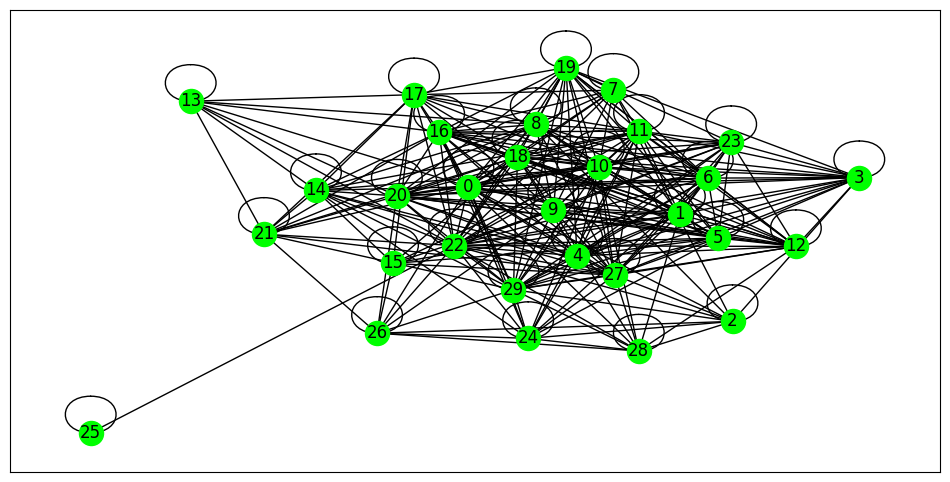

In [13]:
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

similarity_graph = networkx.from_numpy_array(similarity_matrix)

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [14]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score
                                            in scores.items()),
                          reverse=True)
ranked_sentences[:10]

[(0.040721209316877505, 22),
 (0.03994787372328047, 9),
 (0.03939359424138909, 10),
 (0.0375833609071944, 16),
 (0.03744652515777444, 27),
 (0.037387204944521565, 18),
 (0.03661709582201522, 1),
 (0.03563095404425751, 11),
 (0.035492104383262474, 20),
 (0.03518843307678377, 0)]

In [15]:
num_sentences = 5

top_sentence_indices = [ranked_sentences[index][1]
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [16]:
print('.'.join(np.array(sentences)[top_sentence_indices]).replace('.', '.\n'))

By the first century BC, the Roman Empire emerged as the dominant power in the Mediterranean Basin and became a leading cultural, political and religious centre, inaugurating the Pax Romana, a period of more than   years during which Italy's law, technology, economy, art, and literature developed.
.
During the Early Middle Ages, Italy endured the fall of the Western Roman Empire and barbarian invasions, but by the  th century numerous rival city-states and maritime republics, mainly in the northern and central regions of Italy, became prosperous through trade, commerce, and banking, laying the groundwork for modern capitalism.
.
Centuries of foreign meddling and conquest, and the rivalry and infighting between the Italian city-states, such as the Italian Wars of the  th and  th centuries, left Italy politically fragmented, and it was further conquered and divided among multiple foreign European powers over the centuries.
.
Following the rise of the Italian Resistance and the liberation

## Example on a dataset

In [17]:
!gdown 'https://drive.google.com/uc?id=1zT0-f5NOKQOuUkiIc29AG2N9upVswC2n'
dtf = pd.read_csv('/content/data_summary.csv')
dtf.head()

Downloading...
From: https://drive.google.com/uc?id=1zT0-f5NOKQOuUkiIc29AG2N9upVswC2n
To: /content/data_summary.csv
100% 84.5M/84.5M [00:02<00:00, 36.0MB/s]


Unnamed: 0                                               text  \
0           0  It's official: U.S. President Barack Obama wan...   
1           1  (CNN) -- Usain Bolt rounded off the world cham...   
2           2  Kansas City, Missouri (CNN) -- The General Ser...   
3           3  Los Angeles (CNN) -- A medical doctor in Vanco...   
4           4  (CNN) -- Police arrested another teen Thursday...   

                                                   y  
0  Syrian official: Obama climbed to the top of t...  
1  Usain Bolt wins third gold of world championsh...  
2  The employee in agency's Kansas City office is...  
3  NEW: A Canadian doctor says she was part of a ...  
4  Another arrest made in gang rape outside Calif...

In [18]:
i = 1
print("--- Full text ---")
print(dtf["text"].iloc[i])
print(" ")
print("--- Summary ---")
print(dtf["y"].iloc[i])

--- Full text ---
(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m relay. The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover. The 26-year-old Bolt has now collected eight gold medals at world championships, equaling the record held by American trio Carl Lewis, Michael Johnson and Allyson Felix, not to mention the small matter of six Olympic titles. The relay triumph followed individual successes in the 100 and 200 meters in the Russian capital. "I'm proud of myself and I'll continue to work to dominate for as long as possible," Bolt said, having previously expressed his intention to carry on until the 2016 Rio Olympics. Victor

In [20]:
def create_stopwords(lst_langs=["english"], lst_add_words=[], lst_keep_words=[]):
    lst_stopwords = set()
    for lang in lst_langs:
        lst_stopwords = lst_stopwords.union( set(nltk.corpus.stopwords.words(lang)) )
    lst_stopwords = lst_stopwords.union(lst_add_words)
    lst_stopwords = list(set(lst_stopwords) - set(lst_keep_words))
    return sorted(list(set(lst_stopwords)))

lst_stopwords = create_stopwords(lst_langs=['english'], lst_add_words=["cnn","say","said","new","wa","ha"])
# lst_stopwords = lst_stopwords

In [21]:
def utils_preprocess_text(txt, lst_regex=None, punkt=True, lower=True, slang=True, lst_stopwords=None, stemm=False, lemm=True):
    ## Regex (in case, before cleaning)
    if lst_regex is not None:
        for regex in lst_regex:
            txt = re.sub(regex, '', txt)

    ## Clean
    ### separate sentences with '. '
    txt = re.sub(r'\.(?=[^ \W\d])', '. ', str(txt))
    ### remove punctuations and characters
    txt = re.sub(r'[^\w\s]', '', txt) if punkt is True else txt
    ### strip
    txt = " ".join([word.strip() for word in txt.split()])
    ### lowercase
    txt = txt.lower() if lower is True else txt
    ### slang
    txt = contractions.fix(txt) if slang is True else txt

    ## Tokenize (convert from string to list)
    lst_txt = txt.split()

    ## Stemming (remove -ing, -ly, ...)
    if stemm is True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_txt = [ps.stem(word) for word in lst_txt]

    ## Lemmatization (convert the word into root word)
    if lemm is True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_txt = [lem.lemmatize(word) for word in lst_txt]

    ## Stopwords
    if lst_stopwords is not None:
        lst_txt = [word for word in lst_txt if word not in lst_stopwords]

    ## Back to string
    txt = " ".join(lst_txt)
    return txt

def add_preprocessed_text(data, column, lst_regex=None, punkt=False, lower=False, slang=False, lst_stopwords=None, stemm=False, lemm=False, remove_na=True):
    dtf = data.copy()

    ## apply preprocess
    dtf = dtf[ pd.notnull(dtf[column]) ]
    tqdm.pandas(desc='Cleaning text') # lots of cool paramiters you can pass here.
    dtf[column+"_clean"] = dtf[column].progress_apply(lambda x: utils_preprocess_text(x, lst_regex, punkt, lower, slang, lst_stopwords, stemm, lemm))

    ## residuals
    tqdm.pandas(desc='Checking Residuals')
    dtf["check"] = dtf[column+"_clean"].progress_apply(lambda x: len(x))
    if dtf["check"].min() == 0:
        print("--- found NAs ---")
        print(dtf[[column,column+"_clean"]][dtf["check"]==0].head())
        if remove_na is True:
            dtf = dtf[dtf["check"]>0]

    return dtf.drop("check", axis=1)

def add_text_length(data, column):
    dtf = data.copy()
    tqdm.pandas(desc='Word Count')
    dtf['word_count'] = dtf[column].progress_apply(lambda x: len(nltk.word_tokenize(str(x))) )
    tqdm.pandas(desc='Char Count')
    dtf['char_count'] = dtf[column].progress_apply(lambda x: sum(len(word) for word in nltk.word_tokenize(str(x))) )
    tqdm.pandas(desc='Sentence Count')
    dtf['sentence_count'] = dtf[column].progress_apply(lambda x: len(nltk.sent_tokenize(str(x))) )
    dtf['avg_word_length'] = dtf['char_count'] / dtf['word_count']
    dtf['avg_sentence_lenght'] = dtf['word_count'] / dtf['sentence_count']
    print()
    print(dtf[['char_count','word_count','sentence_count','avg_word_length','avg_sentence_lenght']].describe().T[["min","mean","max"]])
    return dtf

def plot_distributions(dtf, x, max_cat=20, top=None, y=None, bins=None, figsize=(10,5)):
    ## univariate
    if y is None:
        fig, ax = plt.subplots(figsize=figsize)
        fig.suptitle(x, fontsize=15)
        ### categorical
        if dtf[x].nunique() <= max_cat:
            if top is None:
                dtf[x].reset_index().groupby(x).count().sort_values(by="index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
            else:
                dtf[x].reset_index().groupby(x).count().sort_values(by="index").tail(top).plot(kind="barh", legend=False, ax=ax).grid(axis='x')
            ax.set(ylabel=None)
        ### numerical
        else:
            sns.distplot(dtf[x], hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
            ax.grid(True)
            ax.set(xlabel=None, yticklabels=[], yticks=[])

    ## bivariate
    else:
        fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=figsize)
        fig.suptitle(x, fontsize=15)
        for i in dtf[y].unique():
            sns.distplot(dtf[dtf[y]==i][x], hist=True, kde=False, bins=bins, hist_kws={"alpha":0.8}, axlabel="", ax=ax[0])
            sns.distplot(dtf[dtf[y]==i][x], hist=False, kde=True, kde_kws={"shade":True}, axlabel="", ax=ax[1])
        ax[0].set(title="histogram")
        ax[0].grid(True)
        ax[0].legend(dtf[y].unique())
        ax[1].set(title="density")
        ax[1].grid(True)
    plt.show()


In [22]:
dtf = add_preprocessed_text(dtf, column="text",
                            punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords, lemm=True)
dtf = add_preprocessed_text(dtf, column="y",
                            punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords, lemm=True)
dtf.head()

Checking Residuals: 100%|██████████| 20000/20000 [00:00<00:00, 757121.92it/s]


Unnamed: 0                                               text  \
0           0  It's official: U.S. President Barack Obama wan...   
1           1  (CNN) -- Usain Bolt rounded off the world cham...   
2           2  Kansas City, Missouri (CNN) -- The General Ser...   
3           3  Los Angeles (CNN) -- A medical doctor in Vanco...   
4           4  (CNN) -- Police arrested another teen Thursday...   

                                                   y  \
0  Syrian official: Obama climbed to the top of t...   
1  Usain Bolt wins third gold of world championsh...   
2  The employee in agency's Kansas City office is...   
3  NEW: A Canadian doctor says she was part of a ...   
4  Another arrest made in gang rape outside Calif...   

                                          text_clean  \
0  official president barack obama want lawmaker ...   
1  usain bolt rounded world championship sunday c...   
2  kansa city missouri general service administra...   
3  los angeles medical doctor vancouver british c...   
4  police arrested another teen thursday sixth su...   

                                             y_clean  
0  syrian official obama climbed top tree doe kno...  
1  usain bolt win third gold world championship a...  
2  employee agency kansa city office among hundre...  
3  canadian doctor part team examining harry burk...  
4  another arrest made gang rape outside californ...

In [24]:
i = 1
print("--- Full text ---")
print(dtf["text_clean"][i])
print(" ")
print("--- Summary ---")
print(dtf["y_clean"][i])

--- Full text ---
usain bolt rounded world championship sunday claiming third gold moscow anchored jamaica victory men 4x100m relay fastest man world charged clear united state rival justin gatlin jamaican quartet nesta carter kemar baileycole nickel ashmeade bolt 3736 second finished second 3756 second canada taking bronze britain disqualified faulty handover 26yearold bolt collected eight gold medal world championship equaling record held american trio carl lewis michael johnson allyson felix mention small matter six olympic title relay triumph followed individual success 100 200 meter russian capital proud ill continue work dominate long possible bolt previously expressed intention carry 2016 rio olympics victory never seriously doubt got baton safely hand ashmeade gatlin united state third leg runner rakieem salaam problem gatlin strayed lane struggled get full control baton never able get term bolt earlier jamaica woman underlined dominance sprint event winning 4x100m relay gold a

In [25]:
X = add_text_length(dtf, "text_clean")

Sentence Count: 100%|██████████| 20000/20000 [00:01<00:00, 17902.39it/s]


                            min         mean          max
char_count           103.000000  2260.120300  10038.00000
word_count            19.000000   363.755600   1309.00000
sentence_count         1.000000     1.000000      1.00000
avg_word_length        3.992945     6.210552     35.34507
avg_sentence_lenght   19.000000   363.755600   1309.00000


In [26]:
def plot_distributions(dtf, x, max_cat=20, top=None, y=None, bins=None, figsize=(10,5)):
    ## univariate
    if y is None:
        fig, ax = plt.subplots(figsize=figsize)
        fig.suptitle(x, fontsize=15)
        ### categorical
        if dtf[x].nunique() <= max_cat:
            if top is None:
                dtf[x].reset_index().groupby(x).count().sort_values(by="index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
            else:
                dtf[x].reset_index().groupby(x).count().sort_values(by="index").tail(top).plot(kind="barh", legend=False, ax=ax).grid(axis='x')
            ax.set(ylabel=None)
        ### numerical
        else:
            sns.distplot(dtf[x], hist=True, kde=True, kde_kws={"fill":True}, ax=ax)
            ax.grid(True)
            ax.set(xlabel=None, yticklabels=[], yticks=[])

    ## bivariate
    else:
        fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=figsize)
        fig.suptitle(x, fontsize=15)
        for i in dtf[y].unique():
            sns.distplot(dtf[dtf[y]==i][x], hist=True, kde=False, bins=bins, hist_kws={"alpha":0.8}, axlabel="", ax=ax[0])
            sns.distplot(dtf[dtf[y]==i][x], hist=False, kde=True, kde_kws={"fill":True}, axlabel="", ax=ax[1])
        ax[0].set(title="histogram")
        ax[0].grid(True)
        ax[0].legend(dtf[y].unique())
        ax[1].set(title="density")
        ax[1].grid(True)
    plt.show()


def evaluate_summary(y_test, predicted):
    rouge_score = rouge.Rouge()
    scores = rouge_score.get_scores(y_test, predicted, avg=True)
    score_1 = round(scores['rouge-1']['f'], 2)
    score_2 = round(scores['rouge-2']['f'], 2)
    score_L = round(scores['rouge-l']['f'], 2)
    print("rouge1:", score_1, "| rouge2:", score_2, "| rougeL:", score_2,
          "--> avg rouge:", round(np.mean([score_1,score_2,score_L]), 2))




<ipython-input-26-187eccae1a28>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf[x], hist=True, kde=True, kde_kws={"fill":True}, ax=ax)


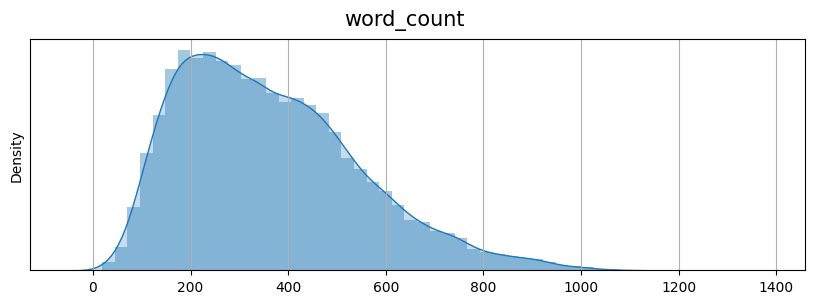

In [28]:
plot_distributions(X, x="word_count", figsize=(10,3))

Sentence Count: 100%|██████████| 20000/20000 [00:00<00:00, 57004.87it/s]
<ipython-input-26-187eccae1a28>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf[x], hist=True, kde=True, kde_kws={"fill":True}, ax=ax)



                       min        mean    max
char_count           35.00  164.703400  319.0
word_count            4.00   27.015400   50.0
sentence_count        1.00    1.000000    1.0
avg_word_length       4.15    6.117243   10.0
avg_sentence_lenght   4.00   27.015400   50.0


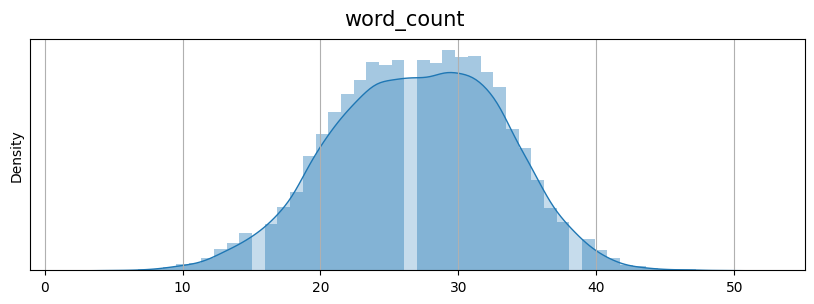

In [29]:
y = add_text_length(dtf, "y_clean")

plot_distributions(y, x="word_count", max_cat=1, figsize=(10,3))


In [31]:
def display_string_matching(a, b, both=True, sentences=True, titles=[]):
    if sentences is True:
        lst_a, lst_b = utils_split_sentences(a, b)
    else:
        lst_a, lst_b = a.split(), b.split()

    ## highlight a
    first_text = []
    for i in lst_a:
        if re.sub(r'[^\w\s]', '', i.lower()) in [re.sub(r'[^\w\s]', '', z.lower()) for z in lst_b]:
            first_text.append('<span style="background-color:rgba(255,215,0,0.3);">' + i + '</span>')
        else:
            first_text.append(i)
    first_text = ' '.join(first_text)

    ## highlight b
    second_text = []
    if both is True:
        for i in lst_b:
            if re.sub(r'[^\w\s]', '', i.lower()) in [re.sub(r'[^\w\s]', '', z.lower()) for z in lst_a]:
                second_text.append('<span style="background-color:rgba(255,215,0,0.3);">' + i + '</span>')
            else:
                second_text.append(i)
    else:
        second_text.append(b)
    second_text = ' '.join(second_text)

    ## concatenate
    if len(titles) > 0:
        first_text = "<strong>"+titles[0]+"</strong><br>"+first_text
    if len(titles) > 1:
        second_text = "<strong>"+titles[1]+"</strong><br>"+second_text
    else:
        second_text = "---"*65+"<br><br>"+second_text
    final_text = first_text +'<br><br>'+ second_text
    return final_text


def textrank(corpus, ratio=0.2):
    if type(corpus) is str:
        corpus = [corpus]
    lst_summaries = [gensim.summarization.summarize(txt, ratio=ratio) for txt in corpus]
    return lst_summaries


In [32]:
vectorizer = TfidfVectorizer(min_df=3, max_df=0.5)
vectorizer = vectorizer.fit(dtf.text_clean)

In [47]:
def summarize_doc(corpus, num_sentences=2):
  sentences = nltk.sent_tokenize(corpus)
  norm_sentences = normalize_corpus(sentences)
  dt_matrix = vectorizer.transform(norm_sentences)
  dt_matrix = dt_matrix.toarray() # from sparse to matrix
  similiarity_matrix = np.matmul(dt_matrix, dt_matrix.T)

  similiarity_graph = networkx.from_numpy_array(similiarity_matrix)
  scores = networkx.pagerank(similiarity_graph)

  ranked_sentences = sorted(((score, index) for index, score in scores.items()),
                            reverse=True)
  # import ipdb
  # ipdb.set_trace()
  top_sentence_indices = [ranked_sentences[index][1] for index in range(num_sentences)]
  top_sentence_indices.sort()

  return ' '.join(np.array(sentences)[top_sentence_indices])


In [43]:
!pip install -q ipdb

In [44]:
from functools import partial

num_sentences = 2
summarize_final = partial(summarize_doc, num_sentences=num_sentences)

dtf_test = dtf.iloc[:1000,:]
tqdm.pandas(desc='Summarizing text')
predicted = dtf_test["text"].progress_apply(summarize_final)

Summarizing text: 100%|██████████| 1000/1000 [00:56<00:00, 17.79it/s]


In [45]:
'''
Find the matching substrings in 2 strings.
:parameter
    :param a: string - raw text
    :param b: string - raw text
:return
    2 lists used in to display matches
'''
def utils_split_sentences(a, b):
    ## find clean matches
    match = difflib.SequenceMatcher(isjunk=None, a=a, b=b, autojunk=True)
    lst_match = [block for block in match.get_matching_blocks() if block.size > 20]

    ## difflib didn't find any match
    if len(lst_match) == 0:
        lst_a, lst_b = nltk.sent_tokenize(a), nltk.sent_tokenize(b)

    ## work with matches
    else:
        first_m, last_m = lst_match[0], lst_match[-1]

        ### a
        string = a[0 : first_m.a]
        lst_a = [t for t in nltk.sent_tokenize(string)]
        for n in range(len(lst_match)):
            m = lst_match[n]
            string = a[m.a : m.a+m.size]
            lst_a.append(string)
            if n+1 < len(lst_match):
                next_m = lst_match[n+1]
                string = a[m.a+m.size : next_m.a]
                lst_a = lst_a + [t for t in nltk.sent_tokenize(string)]
            else:
                break
        string = a[last_m.a+last_m.size :]
        lst_a = lst_a + [t for t in nltk.sent_tokenize(string)]

        ### b
        string = b[0 : first_m.b]
        lst_b = [t for t in nltk.sent_tokenize(string)]
        for n in range(len(lst_match)):
            m = lst_match[n]
            string = b[m.b : m.b+m.size]
            lst_b.append(string)
            if n+1 < len(lst_match):
                next_m = lst_match[n+1]
                string = b[m.b+m.size : next_m.b]
                lst_b = lst_b + [t for t in nltk.sent_tokenize(string)]
            else:
                break
        string = b[last_m.b+last_m.size :]
        lst_b = lst_b + [t for t in nltk.sent_tokenize(string)]

    return lst_a, lst_b


'''
Highlights the matched strings in text.
:parameter
    :param a: string - raw text
    :param b: string - raw text
    :param both: bool - search a in b and, if True, viceversa
    :param sentences: bool - if False matches single words
:return
    text html, it can be visualized on notebook with display(HTML(text))
'''
def display_string_matching(a, b, both=True, sentences=True, titles=[]):
    if sentences is True:
        lst_a, lst_b = utils_split_sentences(a, b)
    else:
        lst_a, lst_b = a.split(), b.split()

    ## highlight a
    first_text = []
    for i in lst_a:
        if re.sub(r'[^\w\s]', '', i.lower()) in [re.sub(r'[^\w\s]', '', z.lower()) for z in lst_b]:
            first_text.append('<span style="background-color:rgba(255,215,0,0.3);">' + i + '</span>')
        else:
            first_text.append(i)
    first_text = ' '.join(first_text)

    ## highlight b
    second_text = []
    if both is True:
        for i in lst_b:
            if re.sub(r'[^\w\s]', '', i.lower()) in [re.sub(r'[^\w\s]', '', z.lower()) for z in lst_a]:
                second_text.append('<span style="background-color:rgba(255,215,0,0.3);">' + i + '</span>')
            else:
                second_text.append(i)
    else:
        second_text.append(b)
    second_text = ' '.join(second_text)

    ## concatenate
    if len(titles) > 0:
        first_text = "<strong>"+titles[0]+"</strong><br>"+first_text
    if len(titles) > 1:
        second_text = "<strong>"+titles[1]+"</strong><br>"+second_text
    else:
        second_text = "---"*65+"<br><br>"+second_text
    final_text = first_text +'<br><br>'+ second_text
    return final_text


In [46]:
i = 1
match = display_string_matching(dtf_test["y"].iloc[i], predicted.iloc[i], both=True, sentences=False,
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [48]:
match = display_string_matching(dtf_test["text"][i], predicted[i], both=True, sentences=True,
                                titles=["Full Text", "Predicted Summary"])
display(HTML(match))

In [49]:
evaluate_summary(dtf_test["y"][i], predicted[i])

rouge1: 0.39 | rouge2: 0.1 | rougeL: 0.1 --> avg rouge: 0.26


## Abstractive Summarization

In [50]:
!pip install txtai
from txtai.pipeline import Summary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 39.7 MB/s eta 0:00:00


 Go here: https://huggingface.co/models?pipeline_tag=summarization and chose any model you want, by default it will use a distilbart

In [51]:
summary = Summary('facebook/bart-large-cnn')

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [52]:
text = ("Search is the base of many applications. Once data starts to pile up, users want to be able to find it. It’s the foundation "
       "of the internet and an ever-growing challenge that is never solved or done. The field of Natural Language Processing (NLP) is "
       "rapidly evolving with a number of new developments. Large-scale general language models are an exciting new capability "
       "allowing us to add amazing functionality quickly with limited compute and people. Innovation continues with new models "
       "and advancements coming in at what seems a weekly basis. This article introduces txtai, an AI-powered search engine "
       "that enables Natural Language Understanding (NLU) based search in any application."
)

summary(text, maxlength=30)

'The field of Natural Language Processing (NLP) is rapidly evolving with a number of new developments. Large-scale general language models are'

In [57]:
i = 0
summarized_text = summary(dtf_test["text"][i], maxlength=40)

In [58]:
match = display_string_matching(dtf_test["y"][i], summarized_text, both=True, sentences=True,
                                titles=["Summary", "Predicted Summary"])
display(HTML(match))

In [59]:
match = display_string_matching(dtf_test["text"][i], summarized_text, both=True, sentences=True,
                                titles=["Full Text", "Predicted Summary"])
display(HTML(match))

In [60]:
evaluate_summary(dtf_test["y"][i], summarized_text)

rouge1: 0.2 | rouge2: 0.08 | rougeL: 0.08 --> avg rouge: 0.16


# Bert Topic Modeling

In [61]:
!pip install -q bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 29.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.3 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039181 sha256=92feb570339abbe413ae9341e2b5e8adfc6a60ca71aec5048b484e54cb80524c
  Stored in di

In [62]:
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [64]:
print(docs[1])

My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt



In [65]:
from bertopic import BERTopic

In [66]:
topic_model = BERTopic(language='english', calculate_probabilities=True, verbose=True)

topics, probs = topic_model.fit_transform(docs)

2023-12-13 15:46:38,711 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2023-12-13 15:47:37,237 - BERTopic - Embedding - Completed ✓
2023-12-13 15:47:37,239 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-13 15:48:16,182 - BERTopic - Dimensionality - Completed ✓
2023-12-13 15:48:16,185 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-13 15:49:02,612 - BERTopic - Cluster - Completed ✓
2023-12-13 15:49:02,625 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-13 15:49:09,714 - BERTopic - Representation - Completed ✓


In [68]:
freq = topic_model.get_topic_info()

freq

Topic  Count                                 Name  \
0       -1   6553                     -1_to_of_and_the   
1        0   1825                 0_game_team_games_he   
2        1    580        1_key_clipper_chip_encryption   
3        2    532             2_whatta_ites_ekr_camels   
4        3    472           3_israel_israeli_jews_arab   
..     ...    ...                                  ...   
213    212     11     212_memory_shared_pixmaps_server   
214    213     11   213_polio_patients_postpolio_motor   
215    214     11           214_placebo_jb_rr_medicine   
216    215     10                  215_24_bit_color_xv   
217    216     10  216_playback_movie_frames_quicktime   

                                        Representation  \
0       [to, of, and, the, is, for, you, in, it, that]   
1    [game, team, games, he, players, season, hocke...   
2    [key, clipper, chip, encryption, keys, escrow,...   
3    [whatta, ites, ekr, camels, hello, cheek, hi, ...   
4    [israel, israeli, jews, arab, jewish, arabs, p...   
..                                                 ...   
213  [memory, shared, pixmaps, server, xputimage, e...   
214  [polio, patients, postpolio, motor, deteriorat...   
215  [placebo, jb, rr, medicine, effect, treatment,...   
216  [24, bit, color, xv, colour, palette, 24bit, c...   
217  [playback, movie, frames, quicktime, fps, 3202...   

                                   Representative_Docs  
0    [ETHER IMPLODES 2 EARTH CORE, IS GRAVITY!!!\n\...  
1    [The FLYERS team that can beat any team on any...  
2    [The following document summarizes the Clipper...  
3                            [\nYep.\n, Hello,, ites:]  
4    [From: Center for Policy Research <cpr>\nSubje...  
..                                                 ...  
213  [\n  There's documentation on how to use the s...  
214  [[reply to keith@actrix.gen.nz (Keith Stewart)...  
215  [T(> Russell Turpin responds to article by Ron...  
216  [    [re a true 24 bit XV]\n\n\nDon't mind if ...  
217  [First off: Thanks to all who have filled me i...  

[218 rows x 5 columns]

In [69]:
topic_model.get_topic(0)

[('game', 0.01037836783315384),
 ('team', 0.009047100638856215),
 ('games', 0.007207157522044517),
 ('he', 0.007045834731147227),
 ('players', 0.0063320219452892125),
 ('season', 0.006262762633937736),
 ('hockey', 0.0061387079684516),
 ('play', 0.005795908306554094),
 ('25', 0.0056615818748637905),
 ('year', 0.0056333758990435735)]

In [70]:
topic_model.visualize_topics()

In [72]:
topic_model.visualize_barchart(top_n_topics=5)

In [73]:
similar_topics, similarity = topic_model.find_topics("vehicle", top_n=5)

for i, sim in enumerate(similar_topics):
    print(similar_topics[i], similarity[i])

5 0.51241004
6 0.43011567
95 0.38960785
144 0.38845384
15 0.33036605


In [77]:
topic_model.get_topic(5)

[('car', 0.023927501325816832),
 ('engine', 0.012505844383255936),
 ('cars', 0.012444564161363596),
 ('ford', 0.0095753752716333),
 ('mustang', 0.008393712695853406),
 ('miles', 0.007642561682935501),
 ('toyota', 0.007573620946949412),
 ('v8', 0.006935763067283092),
 ('v6', 0.006138263963066137),
 ('power', 0.005655961240192886)]

In [ ]:
# topic_model.save("name_of_the_model")
# topic_model = BERTopic.load("name_of_the_model")

## custom model

In [80]:
from sentence_transformers import SentenceTransformer

In [81]:
sentence_model = SentenceTransformer('distilbert-base-nli-mean-tokens', device="cuda")
topic_model = BERTopic(embedding_model=sentence_model, verbose=True)

topics, probs = topic_model.fit_transform(docs)

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/265M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

2023-12-13 15:59:37,516 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2023-12-13 16:00:55,296 - BERTopic - Embedding - Completed ✓
2023-12-13 16:00:55,297 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-13 16:01:13,102 - BERTopic - Dimensionality - Completed ✓
2023-12-13 16:01:13,104 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-13 16:01:16,014 - BERTopic - Cluster - Completed ✓
2023-12-13 16:01:16,023 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-13 16:01:22,955 - BERTopic - Representation - Completed ✓


In [82]:
topic_model.visualize_barchart(top_n_topics=5)

In [83]:
topic_model.visualize_topics()

# Classification

In [85]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel, BertConfig

In [86]:
# this will download the BERT Tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# this will download the BERT Trained Model
# output_hidden_states=False, as we are training & not interested in output state.
config = BertConfig.from_pretrained("bert-base-uncased",output_hidden_states=False) # dropout=0.2, attention_dropout=0.2
bert_model = TFBertModel.from_pretrained('bert-base-uncased', config=config)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [87]:
config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [88]:
sent= 'Just an example, random word: pytorch vs tensorflow'
tokens = bert_tokenizer.tokenize(sent)
print(tokens)

['just', 'an', 'example', ',', 'random', 'word', ':', 'p', '##yt', '##or', '##ch', 'vs', 'tensor', '##flow']


In [89]:
ids_encode = bert_tokenizer.encode_plus(
    sent,
    add_special_tokens = True,
    max_length = 30,
    padding = 'max_length', # for batch training
    return_attention_mask = True,
    truncation=True
)
print("\n\nencode:",ids_encode)



encode: {'input_ids': [101, 2074, 2019, 2742, 1010, 6721, 2773, 1024, 1052, 22123, 2953, 2818, 5443, 23435, 12314, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [90]:
# to go back
print("\ndecode:",bert_tokenizer.decode(ids_encode['input_ids']))


decode: [CLS] just an example, random word : pytorch vs tensorflow [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [91]:
bert_tokenizer.convert_ids_to_tokens(101) # special token

'[CLS]'

In [92]:
%%capture
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar xvzf aclImdb_v1.tar.gz

In [93]:
import os

def fetch_reviews(path):
  data = []
  #path = 'aclImdb/train/pos/'
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())

  return data

In [94]:
import pandas as pd

df_train_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/train/pos/'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/train/neg/'), 'label': 0})

df_test_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/test/pos/'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/test/neg/'), 'label': 0})

# Merging all df's for data cleaning and preprocessing step.
df_train = pd.concat([df_train_pos, df_train_neg], ignore_index=True)
print("Total reviews in df: ", df_train.shape)

df_test = pd.concat([df_test_pos, df_test_neg], ignore_index=True)
df_train.head()


Total reviews in df:  (25000, 2)


review  label
0  Timeless musical gem, with Gene Kelly in top f...      1
1  Welcome to Oakland, where the dead come out to...      1
2  Clair Denis again revisits her theme of estran...      1
3  I'm too old to know (or care) exactly what the...      1
4  I gather at least a few people watched it on S...      1

In [95]:
df_train['label'].value_counts()

1    12500
0    12500
Name: label, dtype: int64

In [98]:
from tqdm import tqdm
import numpy as np

input_ids = []
attention_masks = []

for sent in tqdm(df_train['review']):
    bert_inp = bert_tokenizer.encode_plus(
        sent,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        return_attention_mask=True,
        truncation=True
    )
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids = np.asarray(input_ids)
attention_masks = np.array(attention_masks)
target = np.array(pd.get_dummies(df_train['label']))

100%|██████████| 25000/25000 [03:22<00:00, 123.35it/s]


In [100]:
test_input_ids = []
test_attention_masks = []

for sent in tqdm(df_test['review']):
    bert_inp = bert_tokenizer.encode_plus(
        sent,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        return_attention_mask=True,
        truncation=True
    )
    test_input_ids.append(bert_inp['input_ids'])
    test_attention_masks.append(bert_inp['attention_mask'])

test_input_ids = np.asarray(test_input_ids)
test_attention_masks = np.array(test_attention_masks)
test_target = np.array(pd.get_dummies(df_test['label']))

100%|██████████| 25000/25000 [06:16<00:00, 66.38it/s] 


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val, train_mask, val_mask = train_test_split(input_ids, target, attention_masks, test_size=.2)

In [101]:
bert_model.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
Total params: 109482240 (417.64 MB)
Trainable params: 109482240 (417.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
input_ids = tf.keras.Input(shape=(128,), dtype='int32')
attention_masks = tf.keras.Input(shape=(128,), dtype='int32')

output = bert_model(input_ids, attention_masks)
output = output[0] # top attention head
output = output[:,0,:] # CLS token embedding

output = tf.keras.layers.Dense(32, activation='relu')(output)
output = tf.keras.layers.Dropout(0.2)(output)
output = tf.keras.layers.Dense(2, activation='softmax')(output)

model = tf.keras.models.Model(inputs = [input_ids, attention_masks], outputs=output)

In [106]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_5[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_6[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                             

In [107]:
for layer in model.layers[:3]:
    layer.trainable = False

In [108]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_5[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_6[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                             

In [109]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    [X_train, train_mask],
    y_train,
    batch_size=32,
    epochs=1,
    validation_data=([X_val, val_mask], y_val)
)

625/625 [==============================] - 278s 429ms/step - loss: 0.5132 - accuracy: 0.7452 - val_loss: 0.4432 - val_accuracy: 0.7870


In [110]:
y_pred = model.predict([test_input_ids, test_attention_masks])

782/782 [==============================] - 223s 280ms/step


In [111]:
y_pred

array([[0.49444705, 0.50555295],
       [0.23364355, 0.7663564 ],
       [0.04869918, 0.95130086],
       ...,
       [0.8282779 , 0.17172208],
       [0.77879643, 0.22120358],
       [0.87881196, 0.12118808]], dtype=float32)

In [115]:
test_target

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [112]:
from sklearn.metrics import classification_report

print(classification_report(test_target.argmax(1), y_pred.argmax(1)))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77     12500
           1       0.75      0.86      0.80     12500

    accuracy                           0.79     25000
   macro avg       0.79      0.79      0.78     25000
weighted avg       0.79      0.79      0.78     25000

